<a href="https://colab.research.google.com/github/naphtron/colab/blob/master/Copy_of_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_houses = pd.read_csv('USA_Housing.csv')
df_houses.head(10)
df_houses.shape

(5000, 7)

In [ ]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df_houses.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Remove Address Column

In [ ]:
df_houses.drop('Address',axis=1,inplace=True)

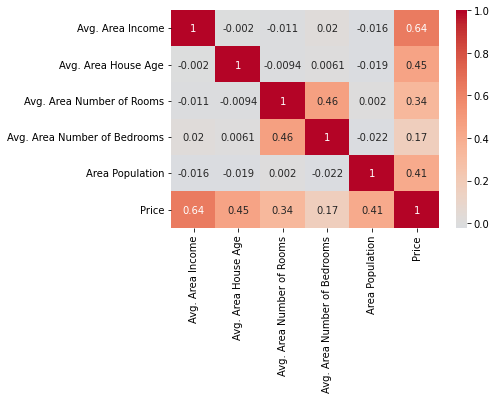

In [ ]:
corr = df_houses.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='coolwarm', center=0, annot=True, annot_kws={'size':10})
plt.show()

In [ ]:
df_houses.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [ ]:
x = df_houses.drop(['Price'], axis=1)
y = df_houses['Price']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore') 

lin_model = LinearRegression()  
houses_model = lin_model.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

prediction = houses_model.predict(X_test)
r2_score = r2_score(Y_test, prediction)
mean_absolute_error = mean_absolute_error(Y_test,prediction)
mean_squared_error = mean_squared_error(Y_test, prediction)
#print(prediction.score(X_train,Y_train))
print("r2_score: ", r2_score)
#print("mean_absolute_error: ",mean_absolute_error)
#print("mean_squared_error: ", mean_squared_error)

r2_score:  0.9146818498754018
